# Author :- Amar Sainath Nandarapu
# Internship : The Sparks Foundation
# Task-2 : Unsupervised Machine Learning
# Key Modules : K - Means Clustering

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Loading the dataset

In [2]:
uml = datasets.load_iris() # We are importing the dataset from ski-kit learn module 
uml_df = pd.DataFrame(uml.data, columns = uml.feature_names)
uml_df.head() # we are printing the top values of list

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Finding the optimum number of clusters

## Check the null values 

In [3]:
uml_df.notnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
145,True,True,True,True
146,True,True,True,True
147,True,True,True,True
148,True,True,True,True


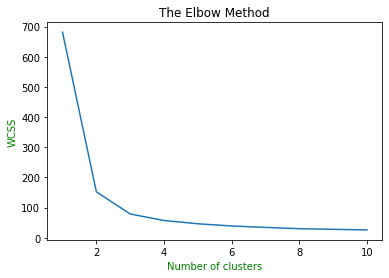

In [4]:
P = uml_df.iloc[:, [0,1,2,3]].values # Creating the set of clusters

from sklearn.cluster import KMeans # Importing " K - Means module to train the algorithm "
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(P)
    wcss.append(kmeans.inertia_)
    
# Plot the graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters', color = "Green")
plt.ylabel('WCSS', color = "Green")
plt.show()

## Creating the K-Means Classifier

In [5]:
kmeans = KMeans(n_clusters = 3, init = "k-means++",
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(P)

## Visualising the clusters on first two columns

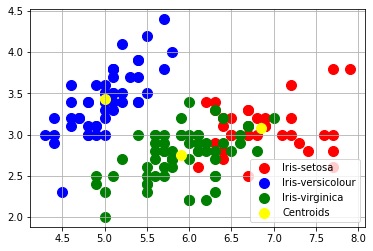

In [6]:
# Plotting the various clusters

plt.scatter(P[ y_kmeans == 0 , 0 ], P[ y_kmeans == 0 , 1 ],
            s = 100, c = "red", label = "Iris-setosa")

plt.scatter(P[ y_kmeans == 1 , 0], P[ y_kmeans == 1 , 1],
            s = 100, c = "blue", label = "Iris-versicolour")

plt.scatter(P[ y_kmeans == 2 , 0], P[ y_kmeans == 2 , 1],
            s = 100, c = "green", label = "Iris-virginica")

# Plotting the centroids of clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 100, c = "yellow", label = "Centroids")

plt.grid()
plt.legend()